In [1]:
"""
Create a map of the abundance of mollusks
"""

MOLLUSCA_APHIA_ID = 51

In [2]:
# === query OBIS for data
# Example query:
# https://api.obis.org/v3/occurrence?taxonid=51&startdate=2021-01-01&enddate=2022-01-01&mof=false

# TODO: this could be done in python like below but... 
# I think this is broken upstream (in the pyobis library)
# import pyobis
# pyobis.occurrences.search(
#     aphiaid=MOLLUSCA_APHIA_ID, 
#     startdate="2021-01-01",
#     enddate="2022-01-01",
#     # mof=False
# )

# NOTE: this could also be done in R using robis

since pyobis is broken we can get the data using curl and then load it into python separately

In [35]:
!curl -X GET "https://api.obis.org/v3/occurrence?taxonid=51&startdate=2021-01-01&enddate=2022-01-01&mof=false&size=500" -H  "accept: */*" \
    > data/curl_obis_query_result.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  983k  100  983k    0     0   939k      0  0:00:01  0:00:01 --:--:--  939k


In [43]:
# === load the json file from curl
import json
import pandas

with open('data/curl_obis_query_result.json') as json_file:
    occurrences = json.load(json_file)
    occurrences_df = pandas.DataFrame(occurrences['results'])
    
print(f"{occurrences['total']} occurrences found in OBIS")
print(f"{len(occurrences['results'])} occurrences downloaded")
print(f"{len(occurrences_df)} occurrences loaded into dataframe")
# i = 1
# occurrences['results'][i]['decimalLatitude']
# occurrences['results'][i]['decimalLongitude']

print("See the first few rows of dataframe below:")
display(occurrences_df.head())



595 occurrences found in OBIS
500 occurrences downloaded
500 occurrences loaded into dataframe
See the first few rows of dataframe below:


,country,date_year,institutionID,scientificNameID,year,scientificName,superfamilyid,county,dropped,aphiaID,...,superorder,superorderid,parentEventID,rightsHolder,footprintWKT,tribeid,tribe,identificationQualifier,infraorderid,infraorder
0,Colombia,2021,891.780.111-8,urn:lsid:marinespecies.org:taxname:419503,2021,Nerita fulgurans,196314.0,Santa Marta,False,419503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,2021,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:510719,NaN,Bathymodiolinae,491766.0,NaN,False,510719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States of America,2021,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:140262,NaN,Littorina littorea,14766.0,NaN,False,140262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colombia,2021,891.780.111-8,urn:lsid:marinespecies.org:taxname:419503,2021,Nerita fulgurans,196314.0,Puebloviejo,False,419503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mexico,2021,UMDI-FC-UNAM,urn:lsid:marinespecies.org:taxname:420751,NaN,Limaria pellucida,246153.0,NaN,False,420751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


500 occurrences are mappable


<AxesSubplot:>

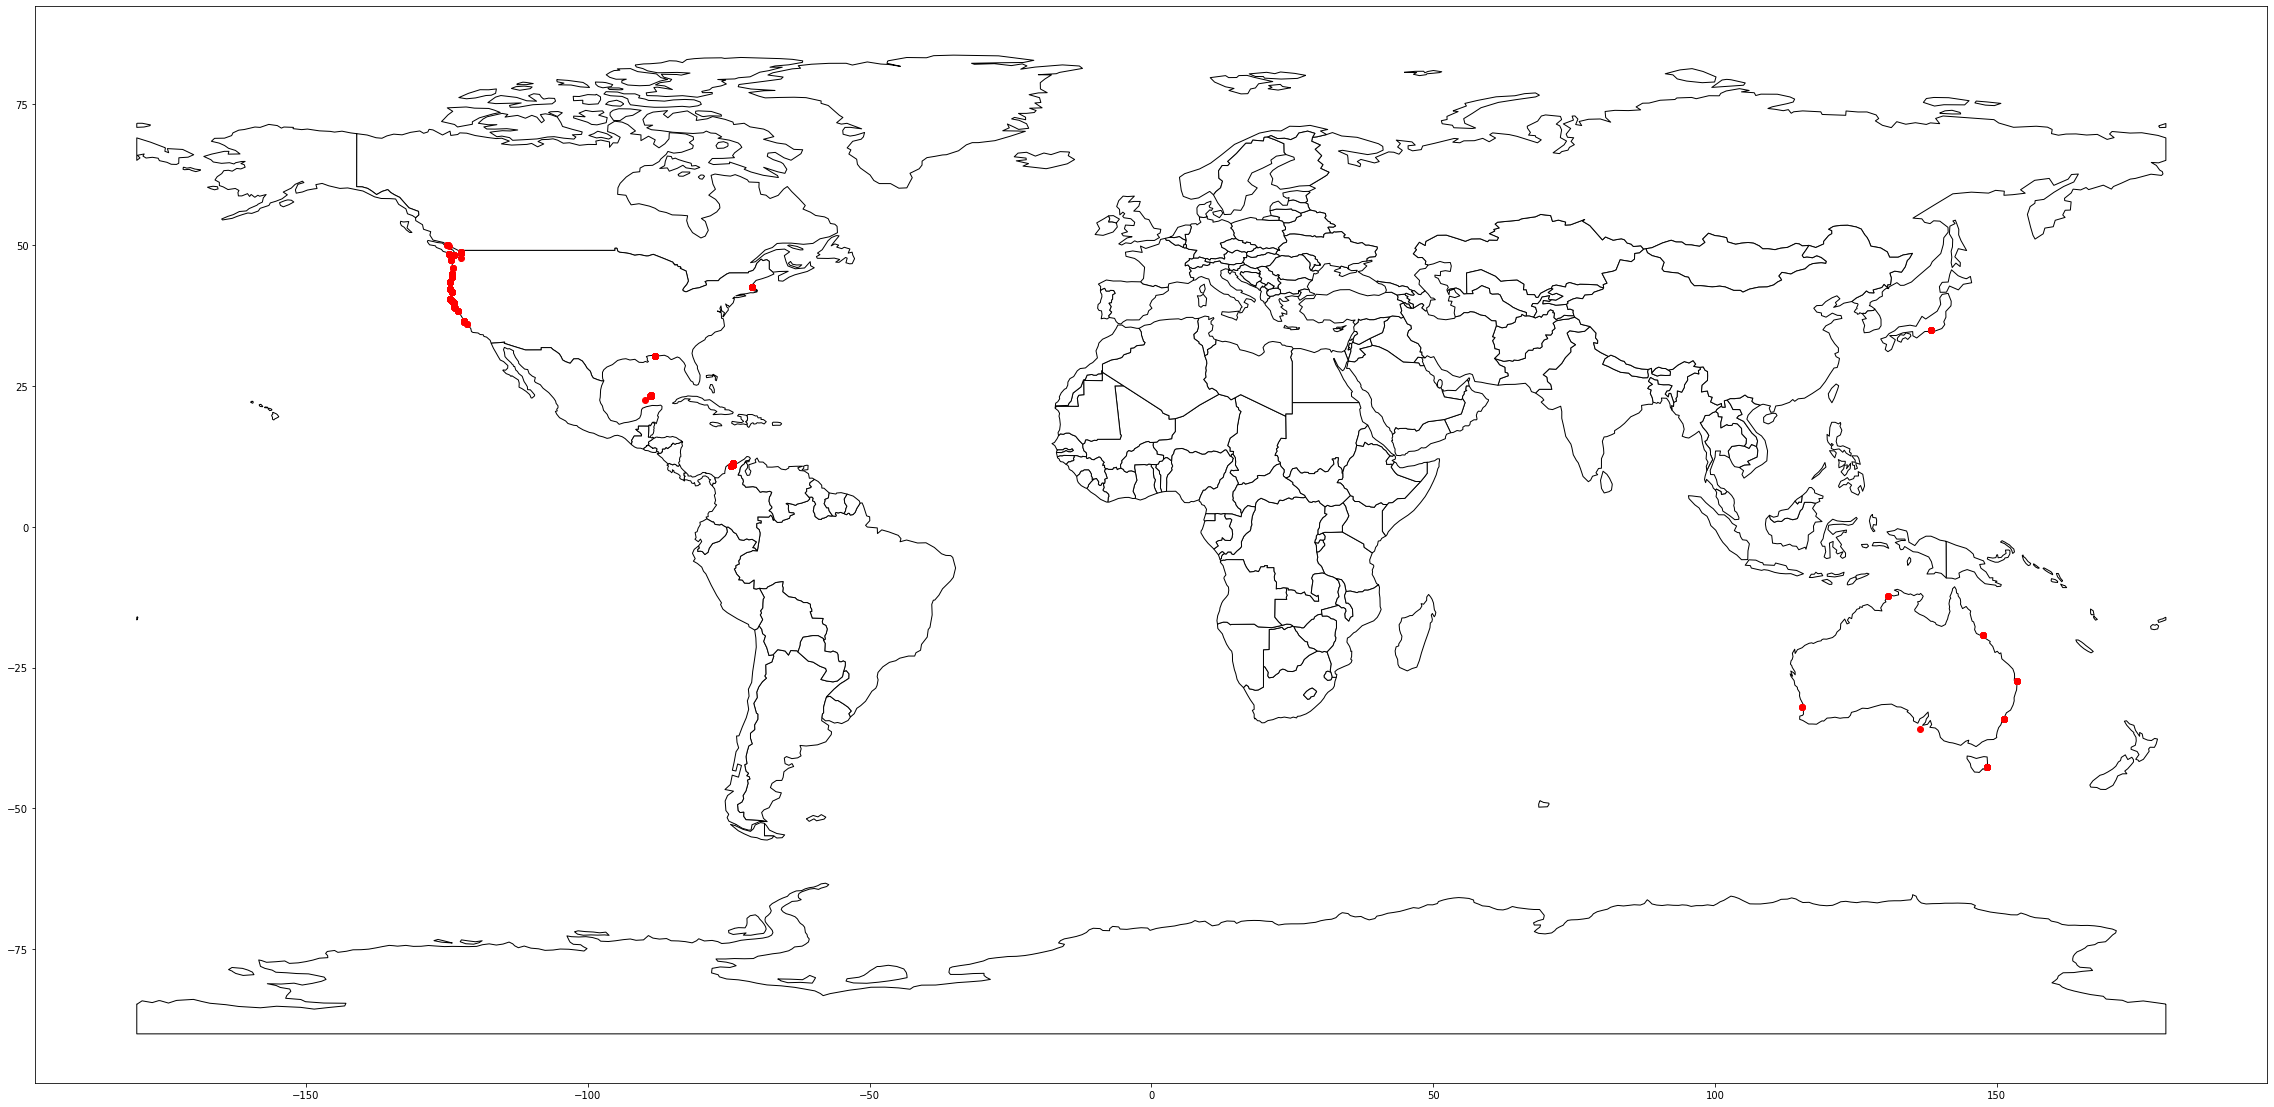

In [37]:
# === map the data
import geopandas

gdf = geopandas.GeoDataFrame(
    occurrences_df, 
    geometry=geopandas.points_from_xy(
        occurrences_df.decimalLongitude, 
        occurrences_df.decimalLatitude
    )
)
print(f"{len(gdf)} occurrences are mappable")

# generate basemap plot axis
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(
    color='white', edgecolor='black',
    figsize=(40,40)
)

# We can now plot our ``GeoDataFrame``.
display(gdf.plot(
    ax=ax, color='red',
))